In [2]:
import requests, zipfile
from io import StringIO
import io
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import linear_model
%precision 3
%matplotlib inline


0      6
1      5
2      8
3     14
4     10
      ..
95    10
96    15
97     9
98    14
99     9
Name: G2, Length: 100, dtype: int64

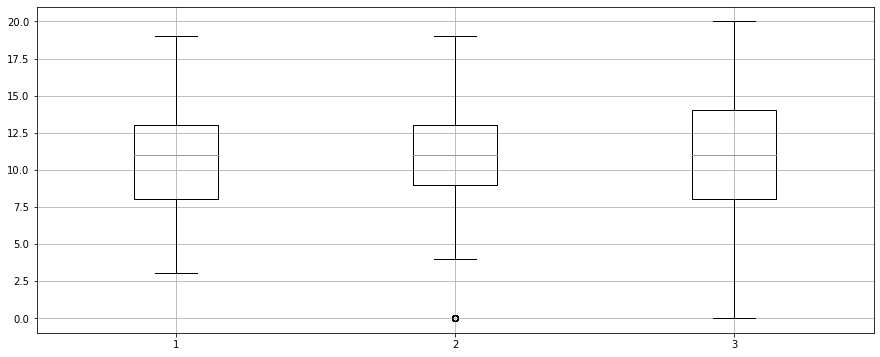

In [58]:
student_data_math = pd.read_csv('student-mat.csv', sep =';')
# student_data_math.head()
# student_data_math['absences'].max()
# plt.hist(student_data_math['absences'])

# student_data_math['absences'].describe()['75%'] - student_data_math['absences'].describe()['25%']
plt.figure(figsize=(15,6))
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)
student_data_math['G2'].head(100)

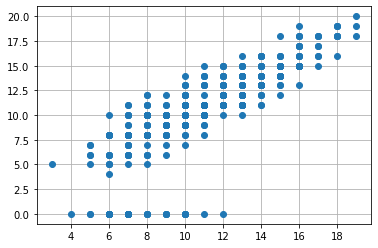

In [111]:
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.grid(True)

In [114]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [133]:
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

(0.801, 0.000)

In [135]:
np.corrcoef([student_data_math['G1'], student_data_math['G3']])

array([[1.   , 0.801],
       [0.801, 1.   ]])

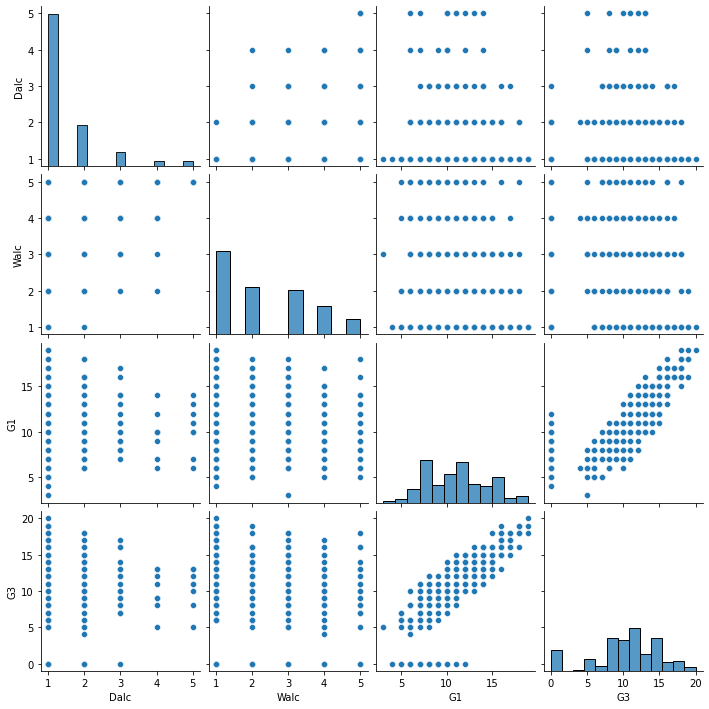

In [141]:
sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [144]:
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

In [7]:
# 연습 문제 3-1
student_data_por = pd.read_csv('student-por.csv', sep = ';')
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [55]:
# 연습 문제 3-2
student_integrated_data = student_data_math.merge(student_data_por, how = 'inner',
                                                  on = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
                                                        'Mjob', 'Fjob', 'reason', 'nursery', 'internet'] ,suffixes = ('_math', '_por'))
student_integrated_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,...,3,4,4,2,2,5,3,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


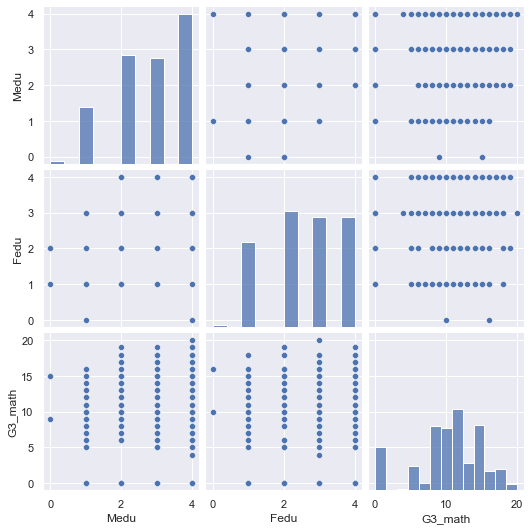

In [72]:
# 연습 문제 3-3
sns.pairplot(student_integrated_data[['Medu','Fedu','G3_math']])

회귀 계수 : [1.106]
절편 : -1.652803828800458


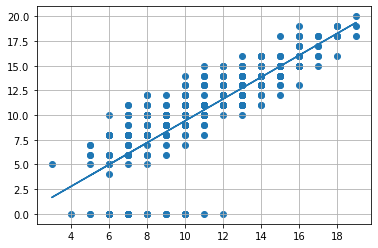

In [12]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = student_data_math.loc[:,['G1']].values
Y = student_data_math['G3'].values
reg.fit(X,Y)
print(f"회귀 계수 : {reg.coef_}")
print(f"절편 : {reg.intercept_}")
plt.scatter(X, Y)
plt.plot(X, reg.predict(X))
plt.grid(True)
# reg.score(X, Y)

In [20]:
# 연습 문제 3-4
reg = linear_model.LinearRegression()
X2 = student_data_por.loc[:, ['G1']].values
Y2 = student_data_por['G3'].values
reg.fit(X2, Y2)
print(f"회귀 계수 : {reg.coef_}")
print(f"절편 : {reg.intercept_}")
print(f"결정 계수 : {reg.score(X2, Y2)}")

회귀 계수 : [0.973]
절편 : 0.8203984121064565
결정 계수 : 0.6829156800171083


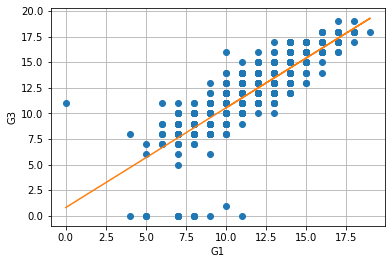

In [24]:
# 연습 문제 3-5
plt.plot(X2, Y2, 'o')
plt.plot(X2, reg.predict(X2))
plt.xlabel('G1')
plt.ylabel('G3')
plt.grid(True)

회귀 계수 : [-0.064]
절편 : 12.138800862687443
결정 계수 : 0.008350131955637385


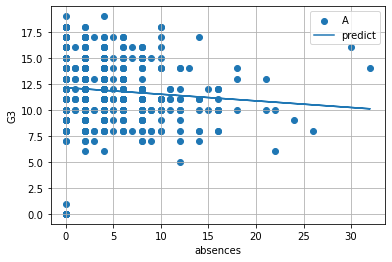

In [27]:
# 연습 문제 3-6
X3 = student_data_por.loc[:, ['absences']].values
Y3 = student_data_por['G3'].values
reg3 = linear_model.LinearRegression()
reg3.fit(X3, Y3)
print(f"회귀 계수 : {reg3.coef_}")
print(f"절편 : {reg3.intercept_}")
print(f"결정 계수 : {reg3.score(X3, Y3)}")

plt.scatter(X3, Y3, label = 'A')
plt.plot(X3, reg3.predict(X3), label = 'predict')
plt.legend()
plt.xlabel('absences')
plt.ylabel('G3')
plt.grid(True)

(array([  8.,  27.,  90., 250., 485., 450., 185.,  74.,  19.,  11.]),
 array([0.99 , 0.991, 0.993, 0.994, 0.996, 0.997, 0.998, 1.   , 1.001,
        1.002, 1.004]),
 <BarContainer object of 10 artists>)

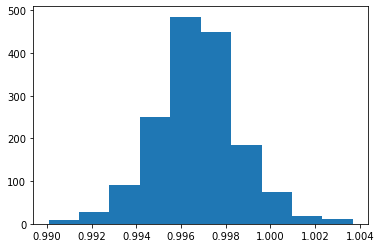

In [4]:
# 종합 문제 3-1
wine_quality = pd.read_csv('winequality-red.csv', sep = ';')
df = wine_quality.describe()
# df.to_csv(path_or_buf = r'C:\Users\semin\DataScience\chap3\total_sol2.csv', sep = ';')
sns.pairplot(wine_quality[['fixed acidity', 'pH', 'alcohol', 'quality']])
# plt.hist(wine_quality['density'], bins = 100)

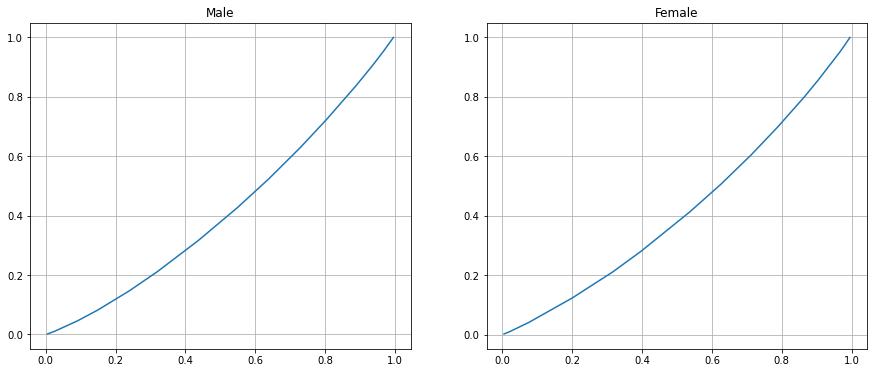

In [74]:
# 종합 문제 3-2
sorted_male_G1 = student_data_math[student_data_math['sex'] == 'M']['G1'].sort_values()
sorted_female_G1 = student_data_math[student_data_math['sex'] == 'F']['G1'].sort_values()
accumul_male_G1 = sorted_male_G1.cumsum()
accumul_female_G1 = sorted_female_G1.cumsum()
mx = np.arange(1, len(sorted_male_G1) + 1)
fx = np.arange(1, len(sorted_female_G1) + 1)
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(mx/(len(sorted_male_G1) + 1), accumul_male_G1 / sorted_male_G1.sum())
plt.title('Male')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(fx/ (len(sorted_female_G1) + 1), accumul_female_G1 / sorted_female_G1.sum())
plt.title("Female")
plt.grid(True)

In [100]:
np.random.seed(0)
calc_steps = 1000
dice_data = np.array([1, 2, 3, 4, 5, 6])
dice_rolls = np.random.choice(dice_data, calc_steps)
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls == i]) / calc_steps
    print(f"{i}가 나올 확률 : {p}")

1가 나올 확률 : 0.171
2가 나올 확률 : 0.157
3가 나올 확률 : 0.157
4가 나올 확률 : 0.183
5가 나올 확률 : 0.161
6가 나올 확률 : 0.171


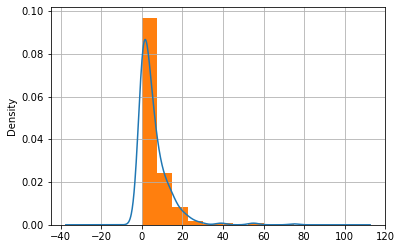

In [10]:
student_data_math['absences'].plot(kind = 'kde')
student_data_math['absences'].hist(density=True)
plt.grid(True)

<AxesSubplot:ylabel='Density'>

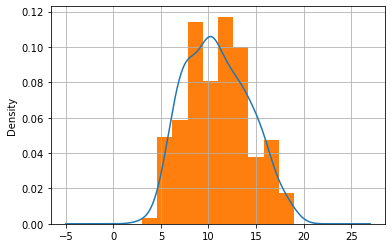

In [6]:
# 연습 문제 4-6

student_data_math['G1'].plot(kind='kde')
student_data_math['G1'].hist(density = True)

In [8]:
student_data_merge = pd.merge(student_data_math, student_data_por, on = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
                                                        'Mjob', 'Fjob', 'reason', 'nursery', 'internet'], suffixes =('_math', '_por'))
print(student_data_merge['G1_math'].mean())
print(student_data_merge['G1_por'].mean())

10.861256544502618
12.112565445026178


In [14]:
t, p = sp.stats.ttest_rel(student_data_merge['G1_math'], student_data_merge['G1_por'])
print(f"p값 = {p}")

p값 = 1.653655521710079e-16


In [16]:
# 연습 문제 4-13
t, p = sp.stats.ttest_rel(student_data_merge['G2_math'], student_data_merge['G2_por'])
print(f"p값 = {p}")
t, p = sp.stats.ttest_rel(student_data_merge['G3_math'], student_data_merge['G3_por'])
print(f"p값 = {p}")

p값 = 4.0622824801348043e-19
p값 = 5.561492113688385e-21


In [9]:
# 종합 문제 4-1
t, p = sp.stats.ttest_rel(student_data_merge['absences_math'], student_data_merge['absences_por'])
print(f"p값 = {p}")
t, p = sp.stats.ttest_rel(student_data_merge['studytime_math'], student_data_merge['studytime_por'])
print(f"p값 = {p}")

p값 = 2.3441656888384195e-06
p값 = 0.5643842756976525


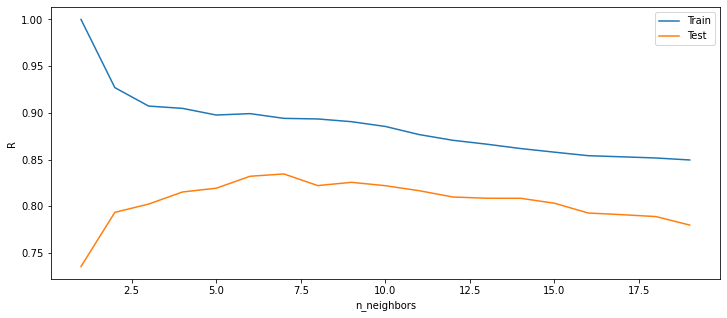

In [63]:
# 연습 문제 8-7
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X = student_data_math.loc[:, 
    ['age','Medu','Fedu','traveltime','studytime',
     'failures','famrel','freetime','goout','Dalc','Walc',
     'absences','G1','G2']].values

y = student_data_math['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

train_R = []
test_R = []

for n_neighbors in range(1,20):
    model = KNeighborsRegressor(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    train_R.append(model.score(X_train, y_train))
    test_R.append(model.score(X_test, y_test))
    
plt.figure(figsize=(12,5))
plt.plot(range(1,20), train_R, label = "Train")
plt.plot(range(1,20), test_R, label = "Test")
plt.xlabel('n_neighbors')
plt.ylabel('R')
plt.legend()